<h1 style="color:white;background-color:rgb(10, 57, 125);font-size:2.5rem;font-weight:bold"> <br> &nbsp; QMUL School of Mathematical Sciences <br> </h1>

<h1> <strong> MTH5005 Programming in Python II </strong> </h1>
<h2> <strong> Week 01 Lab Workbook <strong> </h2>
<h3> <strong> <i> Dr Matthew Lewis </i> </strong> </h3>

In this workbook, we reacquaint ourselves with the syntax and data types that were explored in <em>MTH4000 Programming in Python I</em>.  We will explore some of the key structures that we met in that module, such as assignments, function <span style="font-family:consolas;color:rgb(0,128,0);font-weight:bold;">def</span>initions, <span style="font-family:consolas;color:rgb(0,128,0);font-weight:bold;">if</span> statements, <span style="font-family:consolas;color:rgb(0,128,0);font-weight:bold;">for</span> loops, <span style="font-family:consolas;color:rgb(0,128,0);font-weight:bold;">while</span> loops and module <span style="font-family:consolas;color:rgb(0,128,0);font-weight:bold;">import</span>s.

We begin with the latter.  This recap will be built around a package called <a href="https://pypi.org/project/pillow/">Pillow</a>, which can be imported under the name <samp>PIL</samp>.  We will not use the entire library, but import only the <samp>Image</samp> module, used for creating and processing images.

We will also import the <samp>display</samp> function from the <samp>IPython.display</samp> module, solely for the purpose of being able to render the images we create within this Jupyter Notebook, rather than us being reliant on saving them to our local directory (though that is still an option we retain, if desired).

Given below is a code sample that imports the necessary objects, and uses them to produce some basic colourful patterns.

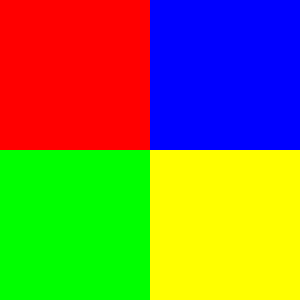

In [3]:
# Import necessary modules and functions.
from PIL import Image
from IPython.display import display

# Select number of pixels in each dimension of the generated image.
width = 300
height = 300

# Define a selection of colours.
# Colours are given as tuples of length three, encoded according to the RGB colour model.
colours = [(255,   0,   0),  # red
           (  0, 255,   0),  # green
           (  0,   0, 255),  # blue
           (255, 255,   0)   # yellow
          ]

# Use the Image module to create a new array of pixels, with dimensions specified above.
img = Image.new('RGB', (width, height))

# Assign desired colour to each pixel.
for x in range(width):
        for y in range(height):
            if (x < width//2) and (y < height//2):
                img.putpixel((x, y), colours[0])
            elif (x < width//2) and (y >= height//2):
                img.putpixel((x, y), colours[1])
            elif (x >= width//2) and (y < height//2):
                img.putpixel((x, y), colours[2])
            else:
                img.putpixel((x, y), colours[3])
            
# Display the generated image under this cell.
display(img)

This read-out demonstrates that the pixel identified with tuple <samp>(i, j)</samp> is located at <samp>i</samp> pixels across from the left, and <samp>j</samp> pixels down from the top.

For each exercise below, we are required to use the <code>Image.new</code> function to construct a new image array, and then use the <samp>putpixel</samp> method of this object to assign a colour to each pixel.  The colours we select will be designed according to the instructions given in the question.

<h2> Exercise 1: <em>Shapes</em> </h2>

In the cell below, produce an image of a blue circle with radius $100$, centred on a green square of side-length $300$.

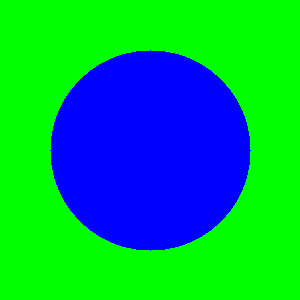

In [5]:
radius = 100
side = 300
green = colours[1]
blue = colours[2]

img = Image.new("RGB", (side, side), green) #green square


#blue circle logic
cx, cy = side // 2, side // 2
#circle: sqrt((i - cx)^2 + (j - cy)^2) = radius
r = radius**2
#circle: (i - cx)^2 + (j - cy)^2 = r

#each pixel is  (i,j)
for i in range(side):
    for j in range(side):
        #dx, dy are how far each pixel is away from the center of the circle
        dx = i - cx
        dy = j - cy
        #if less than the radius then inside the circle.
        if dx*dx + dy*dy <= r:
            img.putpixel((i, j), blue)

display(img)

In the cell below, produce an image of a yellow square with side-length $200$, centred on a red square with side-length $300$.

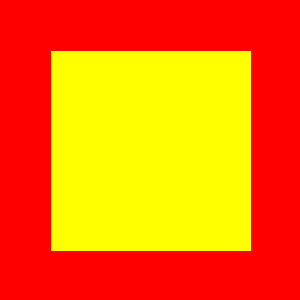

In [6]:
red = colours[0]
yellow = colours[3]

img = Image.new("RGB", (300, 300), red)

for i in range(51,251):
    for j in range(51, 251):
        img.putpixel((i, j), yellow)

display(img) 

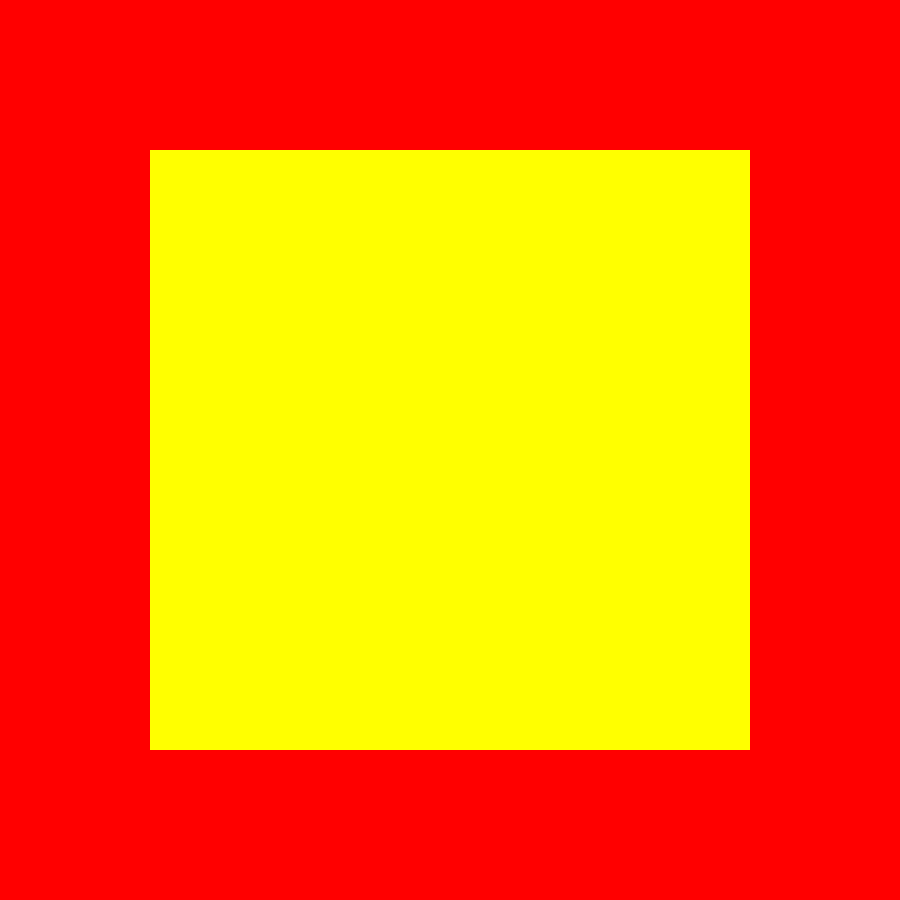

In [7]:
#IF Upscaled:

side = 900
red = colours[0]

img = Image.new("RGB", (side, side), red)

for i in range(side//6, (side//6)*5):
    for j in range(side//6, (side//6)*5):
        img.putpixel((i, j), yellow)

display(img)


<h2> Exercise 2: <em>Newton Basins</em> </h2>

We shall move on now to more complicated constructions.  The aim of this exercise is to generate a <a href="https://en.wikipedia.org/wiki/Newton_fractal">Newton fractal</a>.

Suppose we had some polynomial, $f$, that was of degree $n$.  By the <a href="https://en.wikipedia.org/wiki/Fundamental_theorem_of_algebra">Fundamental Theorem of Algebra</a>, there must exist between $1$ and $n$ complex-valued roots of this polynomial.  <a href="https://en.wikipedia.org/wiki/Newton%27s_method">Newton's method</a> is a root-finding algorithm that (under certain assumptions) will take an initial value $x_0$, and apply the iterative map

$$x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$$

to this value, giving convergence to one of the roots of $f$.

For every point in the complex plane, we can identify the root of $f$ to which it would converge under Newton's method.  These regions are called <em>Newton basins</em> of $f$, and the boundary between them is known as the corresponding <em>Newton fractal</em>.

We will aim to produce an image of (an approximation of) the Newton fractal of the polynomial $f(z) = z^3 - 1$.  The roots of this polynomial are given by $z_0 = 1$, $z_1 = \frac{-1 - i\sqrt{3}}{2}$ and $z_2 = \frac{-1 + i\sqrt{3}}{2}$.  We will store these values in a list (remember that Python encodes complex numbers by using <samp>j</samp> as the imaginary unit).

In [8]:
roots = [1, -0.5 - ((3**0.5)/2)*1j, -0.5 + ((3**0.5)/2)*1j]

In the cell below, define a function <samp>index</samp> that accepts a complex number <samp>z</samp>, and returns <samp>0</samp> if the closest root to <samp>z</samp> is $1$, <samp>1</samp> if the closest root to <samp>z</samp> is $\frac{-1 - i\sqrt{3}}{2}$, and <samp>2</samp> if the closest root to <samp>z</samp> is $\frac{-1 + i\sqrt{3}}{2}$.

In [9]:
"""def index(z):
    d0 = abs(z - roots[0])
    d1 = abs(z - roots[1])
    d2 = abs(z - roots[2])

    if d0 <= d1 AND d0 <= d2:
        return 0
    elif d1 <= d2:
        return 1
    else:
        return 2"""

"""def index(z):
    distances = []
    for k in range(len(roots)): #k = 0, 1, 2
        distances.append(abs(z - roots[k])) #distances to roots[k]
    best_k = distances.index(min(distances))
    return best_k"""

def index(z):
    return min(range(len(roots)), key=lambda k: abs(z - roots[k]))


This <samp>index</samp> function will allow us to select a colour based on the nearest root to a given <samp>z</samp>.  The only thing that remains is for us to be able to identify a complex number <samp>z</samp> with each pixel <samp>(x, y)</samp>.  We will aim to construct our image on a square grid, with side-length given by parameter <samp>l</samp>.

We should therefore define a function that accepts any values <samp>x</samp> and <samp>y</samp> on this grid, and maps it to some complex number.  We will choose to identify the grid with side length <samp>l</samp>, with the subset of the complex plane given by values with real parts between $-1.5$ and $1.5$, and imaginary parts between $-1.5$ and $1.5$.

In the cell below, define a function <samp>z</samp> that accepts three integers, <samp>x</samp>, <samp>y</samp> and <samp>l</samp>, and returns the complex number given by

$$z = \left(-1 + \frac{2x}{l}\right) + \left(1 - \frac{2y}{l}\right)\,i\;.$$

In [12]:
def z(x, y, l):
    return (-1 + 2*x/l) + (1 - 2*y/l)*1j

This mapping will take any pixel <samp>(x, y)</samp> in the grid, and associate it to some value <samp>z</samp> in the square of side-length three, centred at the origin of the complex plane.  The reason that the imaginary part has been multiplied by a factor of $-1$ is that the <samp>Image</samp> module identifies pixels from the top-down, whereas our standard coordinate system identifies complex values upwards from the real-axis-up.

We now have a function <samp>z</samp> that maps a pixel <samp>(x, y)</samp> to a complex number, and a function <samp>index</samp> that maps a complex number to an index <samp>0</samp>, <samp>1</samp> or <samp>2</samp>.  We can take the resulting index, and apply it to our list <samp>colours</samp> to retrieve a tuple corresponding to an RGB colour code that can be placed in the <samp>putpixel</samp> function.

In the cell below, produce an image (of size $255 \times 255$) corresponding to the square of side-length three, centred around the origin of the complex plane, such that each pixel in the image is coloured according to the root of $f(z) = z^3 - 1$ that is nearest to it.

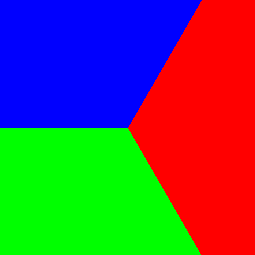

In [14]:
size = 255
img = Image.new("RGB", (size, size))

for x in range(size):
    for y in range(size):
        z0 = z(x, y, size)
        img.putpixel((x, y), colours[index(z0)])

display(img)

Now to return to Newton's method.  It is clear that each region above corresponds simply to the root of $f$ that is nearest to the complex value found in the relative position of the grid.  If we can modify this image so that the values are coloured according to the nearest root after $N$ iterations of the Newton method, then as $N\rightarrow\infty$, the colour-scheme will perfectly match the Newton basins (as each value should, in principle, have arrived at a root after infinitely-many iterations).

The function below implements the Newton method for any differentiable function $f$, initial value $a\in\mathbb{C}$, and number of iterations $N\in\mathbb{N}$:

In [15]:
def newton(f, df, a, N):
    """Return the Newton iterate of function f, with initial value a, after N iterations."""
    for n in range(N):
        a = a - f(a)/df(a)
    return a

In the cell below, define functions $f$ and $df$ that correspond to our polynomial $f(z) = z^3 - 1$ and its derivative.

In [17]:
def f(z):
    return z**3 - 1

def df(z):
    return 3*z**2

Recreate the previous image, but with the colour of each pixel corresponding to the nearest root to each complex value <em>after</em> it has been through a single iteration of the Newton map.

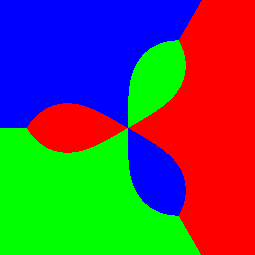

In [18]:
size = 255
img = Image.new("RGB", (size, size))

for x in range(size):
    for y in range(size):
        a0 = z(x, y, size)
        d = df(a0)
        if abs(d) < 1e-12:
            a1 = a0
        else:
            a1 = a0 - f(a0)/d

        img.putpixel((x,y), colours[index(a1)])

display(img)

Finally, pack the above code into a function <samp>newton_fractal</samp> that accepts integers <samp>length</samp>, giving the side-length of the generated image, and <samp>N</samp>, giving the number of iterations of the Newton mapping through which each complex value should be run.  Run this function for values of <samp>N</samp> from <samp>0</samp> to <samp>4</samp>.

In [5]:
def newton_fractal(length, N):
    img =  Image.new("RGB", (length, length))

    for x in range(length):
        for y in range(length):
            a0 = z(x, y, length)
            aN = newton(f, df, a0, N)
            img.putpixel((x, y), colours[index(aN)])

    return img

In [11]:
"""all the code up to this point for this question.
This codebox is so that I can try and pinpoint the error I have made in image scaling"""

roots = [1, -0.5 - ((3**0.5)/2)*1j, -0.5 + ((3**0.5)/2)*1j]

def index(z):
    d0 = abs(z - roots[0])
    d1 = abs(z - roots[1])
    d2 = abs(z - roots[2])

    if d0 <= d1 and d0 <= d2:
        return 0
    elif d1 <= d2:
        return 1
    else:
        return 2
    
def z(x, y, l):
    return (-1.5 + 3*x/l) + (1.5 - 3*y/l)*1j #correction possibly

def newton(f, df, a, N):
    """Return the Newton iterate of function f, with initial value a, after N iterations."""
    for n in range(N):
        a = a - f(a)/df(a)
    return a

def f(z):
    return z**3 - 1

def df(z):
    return 3*z**2

def newton_fractal(length, N):
    img =  Image.new("RGB", (length, length))

    for x in range(length):
        for y in range(length):
            a0 = z(x, y, length)
            aN = newton(f, df, a0, N)
            img.putpixel((x, y), colours[index(aN)])

    return img

size = 255
img = Image.new("RGB", (size, size))

for x in range(size):
    for y in range(size):
        a0 = z(x, y, size)
        d = df(a0)
        if abs(d) < 1e-12:
            a1 = a0
        else:
            a1 = a0 - f(a0)/d

        img.putpixel((x,y), colours[index(a1)])


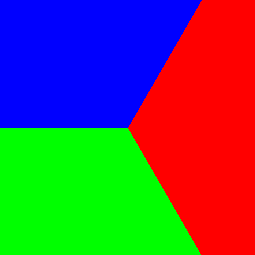

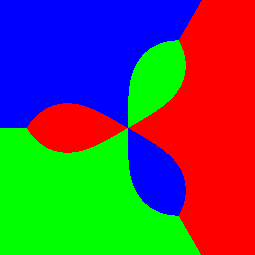

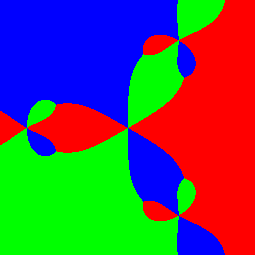

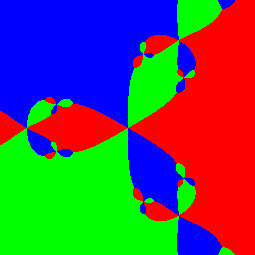

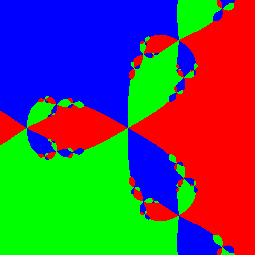

In [22]:
for N in range(5):
    display(newton_fractal(255, N))

If the above calls worked, then the following command should produce a highly-accurate rendering of the Newton fractal of $f(z) = z^3 - 1$:

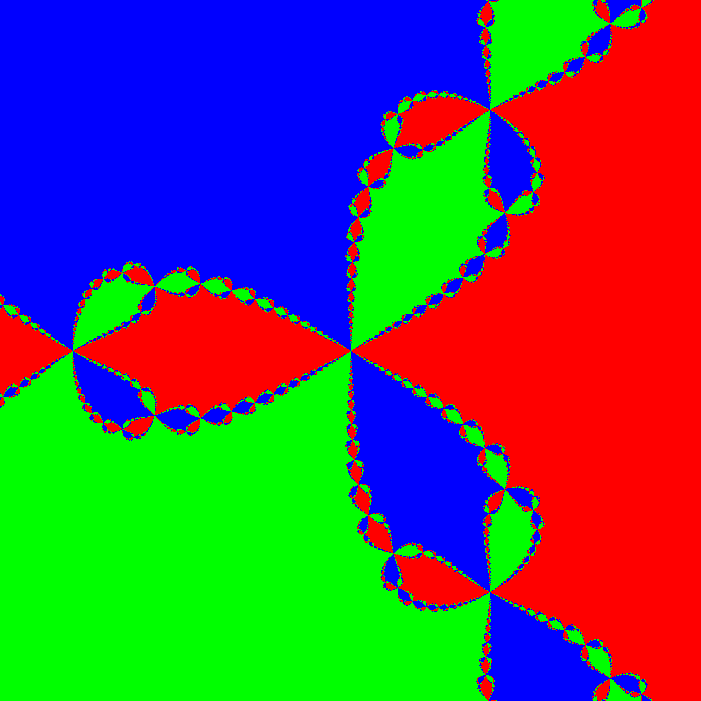

In [23]:
newton_fractal(701, 50)

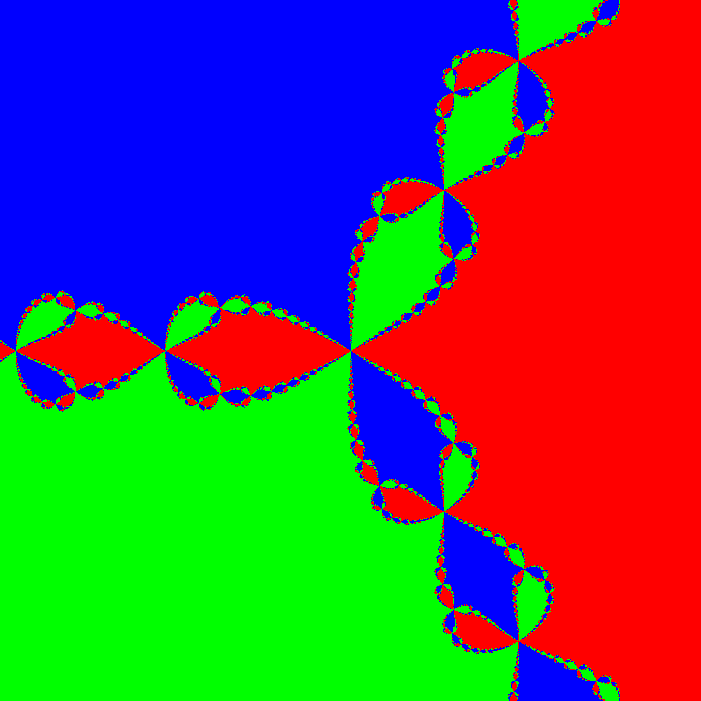

In [ ]:
"""Second Attempt


Exercise sheet had defined the formula to be: (-1 + 2*x/l) + (1 - 2*y/l)*1j

When it should have been: (-1.5 + 3*x/l) + (1.5 - 3*y/l)*1j

"""

newton_fractal(701, 50)

<h2> Exercise 3: <em>Julia Sets</em> </h2>

Newton fractals are only a specific type of a wider class of fractals called <a href="https://en.wikipedia.org/wiki/Julia_set">Julia sets</a>.  The Julia set of a function $g$ is the smallest closed subset of $\mathbb{C}$ that is invariant under the mapping $g$ (technically, they are the smallest such sets with at least three points, to preclude trivial cases like solitary points).

Consider our Newton fractals above.  The fractal itself was just the boundary between the Newton basins.  Hence, a point was on the fractal if and only if <em>any</em> size perturbation could change the root to which it converges.  We have the Newton mapping $g$ given by

$$g(x) = x - \frac{f(x)}{f'(x)}\;,$$

for some differentiable function, $f$.  Since the root at which an iterate converges does not change under a mapping through this $g$, any point on the Newton fractal would remain on the fractal after being mapped through $g$ (although potentially on a very different part of it).  Newton fractals can therefore be thought of as the Julia sets of such functions as $g$.

We will conclude by plotting the Julia sets of functions of the form $g(z) = z^2 + c$, for some $c \in \mathbb{C}$.  In the cell below, define a function <samp>g</samp> that accepts parameters <samp>z</samp> and <samp>c</samp>, and returns the value given by this mapping.

In [46]:
def g(z, c):
    return z**2 + c

It is a proven result that for any fixed $c$, the value $z_0 \in \mathbb{C}$ is contained within the Julia set of the corresponding $g$ if and only if the iterates that result from the mapping $z_{n+1} = g(z_n)$ satisfy the property $|z_n| \leq 2$ for all $n \in \mathbb{N}$.

It will not be possible to test this bound for <em>all</em> iterates, but we can test the values $z_0, z_1, z_2, \ldots, z_{N-1}$, for some $N\in\mathbb{N}$.

Write a function <samp>count</samp> that accepts complex numbers <samp>z</samp> and <samp>c</samp>, and integer <samp>N</samp>, and returns the first index $n\in\{0, 1, 2, \ldots, N-1\}$ such that $|z_n| > 2$.  If no index $n$ in this range gives a value $|z_n|$ that exceeds this bound of two, then the function should return the maximal number of iterations, $N$. 

In [40]:
def count(z, c, N):
    for n in range(N):
        if abs(z) > 2:
            return n
        z = g(z, c)

    return N

We will now fix $c = -0.7 + 0.27015i$, and choose a maximal number of iterations given by $N = 255$.

In the cell below, produce a pixel array of size $701 \times 701$.  Each pixel in this array should correspond to a point $z_0 \in \mathbb{C}$ within the square of side-length three, centred at the origin of the complex plane.  If the value $z_0$ is such that its resulting iterates satisfy $|z_n| \leq 2$ for $n \in \{0, 1, \ldots, N-1\}$, then the matching pixel should be coloured in black.  The pixel should otherwise be white.

The RGB code for black is given by $(0, 0, 0)$, and the code for white is $(255, 255, 255)$.

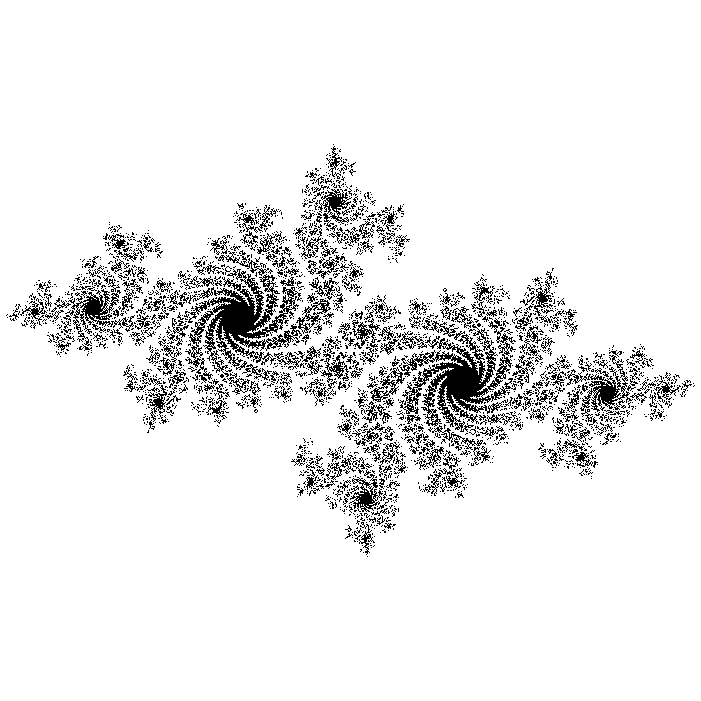

In [41]:
c = -0.7 + 0.27015*1j
N = 255
length = 701

black = (0, 0, 0)
white = (255, 255, 255)

def z(x, y, l):
    l -= 1
    return (-1.5 + 3*x/l) + (1.5 - 3*y/l)*1j

img = Image.new("RGB", (length, length), white)

for x in range(length):
    for y in range(length):
        z0 = z(x, y, length)
        if count(z0, c, N) == N:
            img.putpixel((x, y), black)
        else:
            img.putpixel((x, y), white)

display(img)

We can improve this image by adding some shading.  Instead of mapping all bounded cells to black pixels and all divergent cells to white pixels, we can instead make each cell some shade of grey, with the darkness of the shade corresponding to the number of iterations that the initial value required for its absolute value to exceed the bound of two.

In the cell below, adjust the code above to produce an image of the same Julia set, but with the RGB value of each pixel given by $(255 - n, 255 - n, 255 - n)$, where $n \in \{0, 1, \ldots, N-1\}$ is the first index such that the corresponding complex value $z_n$ satisfies $|z_n| > 2$.  As before, if no such $n$ in the range has this property, it should be assigned the maximal number of iterations, $N$.

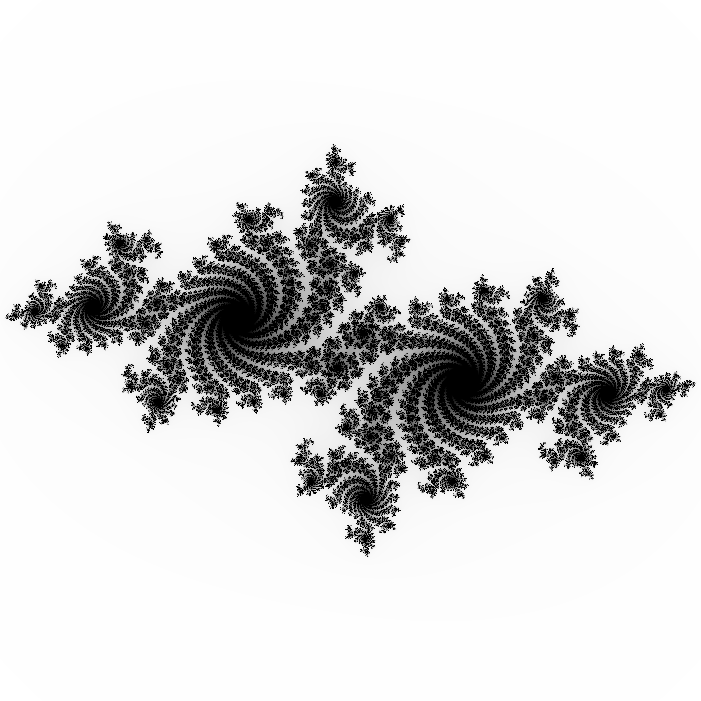

In [42]:
c = -0.7 + 0.27015*1j
N = 255
length = 701

black = (0, 0, 0)
white = (255, 255, 255)

def z(x, y, l):
    l -= 1
    return (-1.5 + 3*x/l) + (1.5 - 3*y/l)*1j

img = Image.new("RGB", (length, length), white)

for x in range(length):
    for y in range(length):
        z0 = z(x, y, length)
        n = count(z0, c, N)
        shade = 255 - n
        img.putpixel((x, y), (shade, shade, shade))

display(img)

We will finish by adding a splash of colour to the image.  We can use the same principle as above, only instead of using the bland colour palette

$$(255 - n,\; 255 - n,\; 255 - n)\;,$$

which consists only of shades of grey, we will use

$$\left( 127 + 127\sin\left(\frac{2 \pi n}{N}\right),\; 127 + 127\cos\left(\frac{2 \pi n}{N}\right),\; 127 - 127\sin\left(\frac{2 \pi n}{N}\right) \right)\;.$$

Implement this colour palette in the cell below.

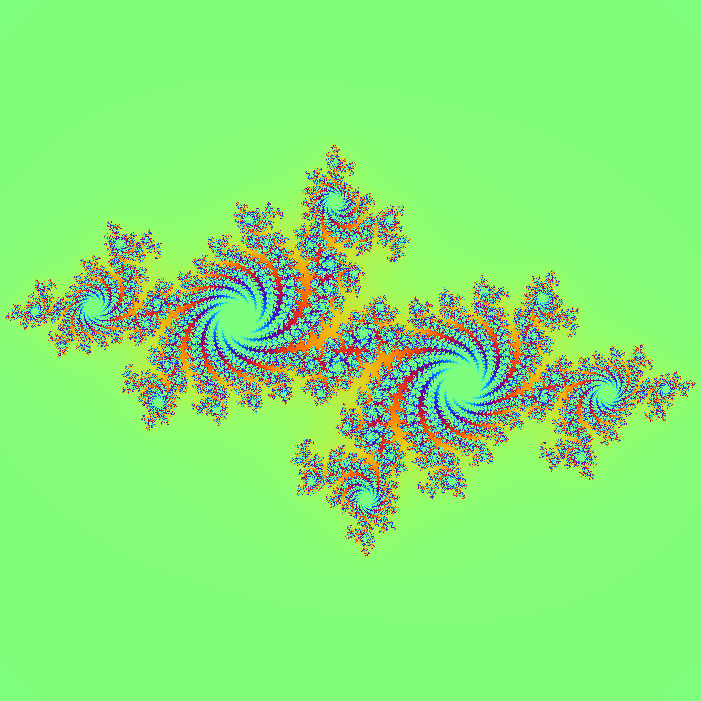

In [51]:
import math 

c = -0.7 + 0.27015*1j
N = 255
length = 701

black = (0, 0, 0)
white = (255, 255, 255)

def z(x, y, l):
    l -= 1
    return (-1.5 + 3*x/l) + (1.5 - 3*y/l)*1j

img = Image.new("RGB", (length, length), white)

for x in range(length):
    for y in range(length):
        z0 = z(x, y, length)
        n = count(z0, c, N)

        t = 2*math.pi*n/N
        colour = (
                        int(127 + 127*math.sin(t)),
                        int(127 + 127*math.cos(t)),
                        int(127 - 127*math.sin(t))
            )

        img.putpixel((x, y), colour)

display(img)

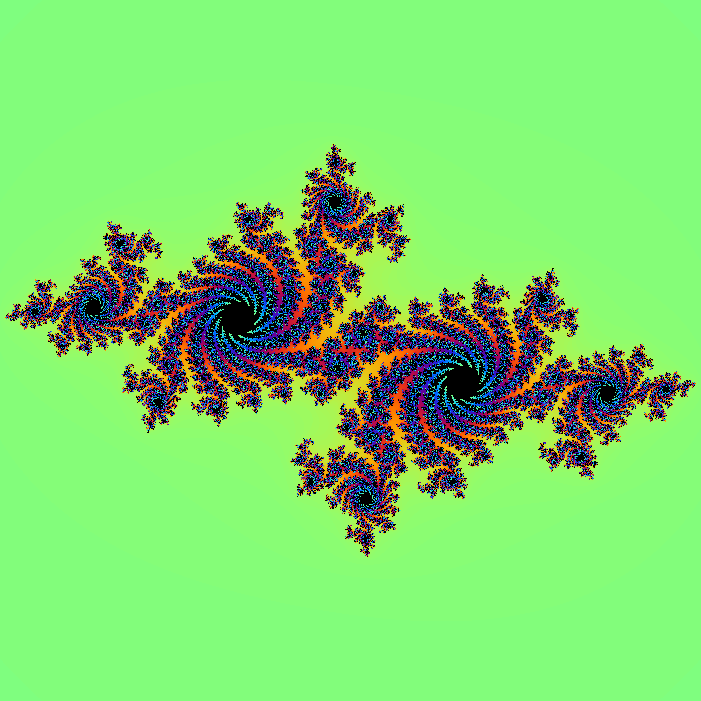

In [ ]:
"""I couldn't see the colours very well and wanted to make them more visible so I made all the pixels inside the fractals black"""

import math 

c = -0.7 + 0.27015*1j
N = 255
length = 701

black = (0, 0, 0)
white = (255, 255, 255)

def z(x, y, l):
    l -= 1
    return (-1.5 + 3*x/l) + (1.5 - 3*y/l)*1j

img = Image.new("RGB", (length, length), white)

for x in range(length):
    for y in range(length):
        z0 = z(x, y, length)
        n = count(z0, c, N)

        if n == N:
            colour = black

        else:
            t = 2*math.pi*n/N
            colour = (
                        int(127 + 127*math.sin(t)),
                        int(127 + 127*math.cos(t)),
                        int(127 - 127*math.sin(t))
            )

        img.putpixel((x, y), colour)

display(img)

<h2> Feedback </h2>

Attempt all of these questions during the Week 01 Lab Sessions. This worksheet will be discussed in detail on a Lab Walkthrough video to be posted to QMplus at the end of the week.

If you have any problems or questions, or simply you would like some feedback, then you can:

<ul>
    <li> Ask the tutors present in your IT Lab sessions.</li><br>
    <li> Ask the Student Forum on the module's QMplus page.</li><br>
    <li> Email the lecturer for assistance.</li>
</ul>